# Task A1

Imagine you are given a task by your game company to create an intelligent NPC. You would like to train an artificial neural network (ANN) that acts as the brain of your NPC. 
Your ANN must learn to handle your NPC's decision-making process in your game - that is, whether the NPC will attack or flee, depending on the NPC’s power and the enemy’s power, as described in the following table.

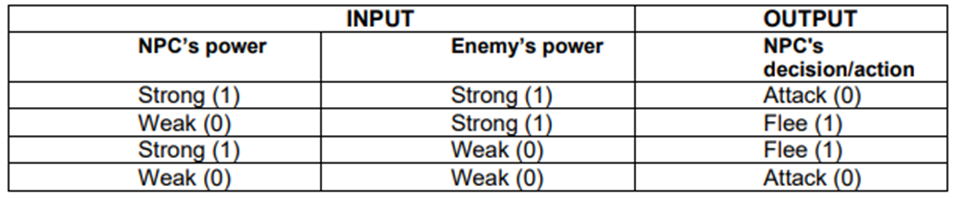

## Task A1.1
Develop a computer program to implement an ANN, with the Sigmoid function as the activation function, to make the decision according to the table. Your ANN should consist of 2 input neurons, 1 hidden layer with 2 neurons and 1 output neuron. Then train your ANN using the backpropagation technique to learn the NPC's decision/action table.

In [44]:
# Libraries
import numpy as np

class Neuron:
  Id = 0
  Layer = 0
  Bias = 0.0
  Input = 0.0
  Output = 0.0
  def __init__(self, Id, layer):
    self.Id = Id  
    self.Layer = layer

  def CalcInput(self, Input, Weight):
    return self.Bias + (Input * Weight)

class Weight:
  Id = 0
  Pointer = 0
  Value = 0.0

  def __init__(self, Id, Ptr, Val = 0.0):
    self.Id = Id
    self.Pointer = Ptr
    self.Value = Val
  
  def UpdateWeight(self, ALPHA, X, E):
    self.Value += ALPHA * X * E


# Activation Class
class Act:
  def Step(X, THRESHOLD = 0.0): 
      if X >= THRESHOLD: return 1.0
      else: return 0.0

  def Sigmoid(X): 
    return 1.0 / (1.0 + np.exp(-X))

  def SigmoidDelta(X): 
    return X * (1-X)

# Nueral Network Model Class
class Model:
  # Training Data
  XData = []
  YData = []

  # Neural Attributes
  Neurons = []
  Weights = []
  
  NeuronID = 0
  def CreateNeuronID(self): 
    self.NeuronID += 1
    return self.NeuronID
  
  def TrainingData(self, X, YD):
    # Set input output data
    self.XData = X
    self.YData = YD
  
  # Error Function
  def ANN_Error(self, YD, Y):
      return YD - Y
  
  def InitNeuralNet(self):
    # Initialise weights
    self.Weights = [Weight(0, 1), Weight(1, 1)]

  # Run model
  def TrainModel(self, LearnRate = 0.1, EpochMax = 1000):
    # Init Nerual Newtwork 
    self.InitNeuralNet()
    
    # Initialise neurons
    self.Neurons.append(Neuron(self.CreateNeuronID(), 0))

    # Basic Forward Propogation
    for epochCount in range(0, EpochMax,1):

      for case in range(0, len(self.XData[0]),1):

        for n in self.Neurons:

          # Calculate Input
          n.Input = 0.0     # Reset ready for cummulative calculations
          for w in self.Weights:

            # Find the weights that point to our neuron ID
            if w.Pointer == n.Id: 

              # Get the input from the case data with matching path start
              n.Input += n.CalcInput(self.XData[w.Id][case], w.Value)
          
          # Calculate Output
          n.Output = Act.Step(n.Input, 0.195)

          # Calculate error
          Error = self.YData[case] - n.Output

          # Update weights
          for w in self.Weights:
            if w.Pointer == n.Id:
              w.UpdateWeight(LearnRate, self.XData[w.Id][case], Error)
      
  def PrintResults(self):
    for w in self.Weights:
      print("Weight ID: ", w.Id, "Weight Pointer: ", w.Pointer, "Weight Value: ", w.Value)
    for n in self.Neurons:
      print("Neuron ID: ", n.Id, "Neuron Layer: ", n.Layer, 
            "Neuron Input: ", n.Input, "Neuron Output: ", n.Output)

# Initialise Model
model = Model()

# Set training data X, YD
model.TrainingData([[0.0, 0.0, 1.0, 1.0], [0.0, 1.0, 0.0, 1.0]], [0.0, 0.0, 0.0, 1.0])

# Train model
model.TrainModel(EpochMax= 10)

# Print results
model.PrintResults()

Weight ID:  0 Weight Pointer:  1 Weight Value:  0.1
Weight ID:  1 Weight Pointer:  1 Weight Value:  0.1
Neuron ID:  1 Neuron Layer:  0 Neuron Input:  0.2 Neuron Output:  1.0


## Task A1.2
Analyse and evaluate the effect of the learning rate and find the optimal learning rate in this case.

## Task A1.3
Analyse and evaluate the effects of activation functions by comparing Sigmoid function with the Sign function and Step function. Find out what is the best activation function for this application.